# Data: vehicles.csv from https://www.fueleconomy.gov/feg/ws/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/dhuynh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

In [2]:
# read data and check size
dat = pd.read_csv("vehicles.csv")
dat.shape

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(43663, 83)

In [3]:
# top of df
dat.head(5)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
# bottom of df
dat.tail(5)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
43658,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43659,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43660,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43661,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43662,18.311667,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
dat.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43663 entries, 0 to 43662
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        43663 non-null  float64
 1   barrelsA08       43663 non-null  float64
 2   charge120        43663 non-null  float64
 3   charge240        43663 non-null  float64
 4   city08           43663 non-null  int64  
 5   city08U          43663 non-null  float64
 6   cityA08          43663 non-null  int64  
 7   cityA08U         43663 non-null  float64
 8   cityCD           43663 non-null  float64
 9   cityE            43663 non-null  float64
 10  cityUF           43663 non-null  float64
 11  co2              43663 non-null  int64  
 12  co2A             43663 non-null  int64  
 13  co2TailpipeAGpm  43663 non-null  float64
 14  co2TailpipeGpm   43663 non-null  float64
 15  comb08           43663 non-null  int64  
 16  comb08U          43663 non-null  float64
 17  combA08     

In [6]:
# some basic stats
dat.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,43663.000000,43663.000000,43663.0,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,...,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000,43663.000000
mean,17.115707,0.222444,0.0,0.069126,18.693951,7.021316,0.793280,0.656699,0.000494,0.494322,...,23.670017,1.046068,34.809010,1.288345,2002.643520,-4260.907404,0.014465,0.237684,0.239700,0.237524
std,4.686725,1.143433,0.0,0.756315,8.876232,12.792717,6.119312,6.010857,0.038122,4.814261,...,12.622265,8.627726,12.119048,8.772993,11.706039,3586.584491,0.305459,3.566930,3.445856,3.489574
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-31500.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.400000,0.000000,28.000000,0.000000,1992.000000,-6250.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.696000,0.000000,33.400000,0.000000,2004.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
75%,19.388824,0.000000,0.0,0.000000,21.000000,15.953600,0.000000,0.000000,0.000000,0.000000,...,26.000000,0.000000,39.400000,0.000000,2013.000000,-2000.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,15.300000,150.000000,150.195800,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,187.100000,173.143600,2022.000000,6250.000000,9.600000,97.000000,81.000000,88.000000


In [7]:
dat.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31689
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

In [8]:
dat.isnull().mean()

barrels08     0.000000
barrelsA08    0.000000
charge120     0.000000
charge240     0.000000
city08        0.000000
                ...   
modifiedOn    0.000000
startStop     0.725763
phevCity      0.000000
phevHwy       0.000000
phevComb      0.000000
Length: 83, dtype: float64

In [9]:
pd.value_counts(dat.atvType)

FFV               1481
Diesel            1136
Hybrid             815
EV                 287
Plug-in Hybrid     236
CNG                 50
Bifuel (CNG)        20
Bifuel (LPG)         8
Name: atvType, dtype: int64

In [10]:
pd.unique(dat.cylinders)

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., nan, 16.])

In [11]:
pd.unique(dat.trany)

array(['Manual 5-spd', 'Automatic 3-spd', 'Automatic 4-spd',
       'Automatic 5-spd', 'Manual 4-spd', 'Manual 3-spd', 'Manual 6-spd',
       'Automatic (S5)', 'Automatic (variable gear ratios)',
       'Automatic 6-spd', 'Automatic (S6)', nan, 'Automatic (S4)',
       'Automatic 7-spd', 'Automatic (S7)', 'Automatic (S8)',
       'Automatic (AM5)', 'Automatic (AM6)', 'Automatic (AV-S7)',
       'Automatic (AV-S6)', 'Automatic (AM7)', 'Manual 4-spd Doubled',
       'Manual 7-spd', 'Automatic (L4)', 'Automatic (L3)',
       'Automatic (AV-S8)', 'Automatic 8-spd', 'Automatic (A1)',
       'Automatic (AM-S6)', 'Automatic (AM-S7)', 'Automatic 9-spd',
       'Automatic (S9)', 'Automatic (AM-S8)', 'Automatic (AM8)',
       'Automatic (AM-S9)', 'Automatic (S10)', 'Automatic (AV-S10)',
       'Automatic 10-spd', 'Automatic (A2)', 'Automatic (AV-S1)',
       'Automatic (AM-S10)'], dtype=object)

In [12]:
pd.unique(dat.fuelType1)
# fuelType2 is alternative fuel type for dual fuel vehicles

array(['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Natural Gas',
       'Electricity', 'Midgrade Gasoline'], dtype=object)

In [13]:
pd.unique(dat.year)

array([1985, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 1986,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 1984, 1987,
       1988, 1989, 1990, 1991, 1992, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [14]:
# engine size
pd.unique(dat.displ)

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 6.2, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6,
       5.4, 5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 1.7, 4.4,
       3.7, 6.7, 4.8, nan, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, 6.6, 6.4, 0.6,
       0. , 0.9])

In [15]:
pd.unique(dat.drive)

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive'],
      dtype=object)

In [16]:
pd.unique(dat.comb08)

array([ 21,  11,  27,  19,  22,  25,  24,  26,  13,  23,  20,  16,  18,
        17,  15,  10,  14,  12,  28,  34,  30,  33,  31,  41,  40,  47,
        38,  36,  32,  43,  29,   8,  35,   9,  37,  53,  85,  72,  46,
         7,  48,  65,  39,  75,  78,  52,  42,  50,  58,  56,  55,  98,
        99,  87,  44, 112,  62, 102,  73, 105,  89, 118, 107, 121,  76,
        95, 116, 115,  94, 119, 114,  63, 124,  84,  93, 100, 101,  92,
       103, 104, 136,  49,  86,  54, 108, 126, 130, 120, 113, 123,  74,
       131, 133, 111,  97, 109,  96,  79, 141,  90,  69,  68,  77, 117,
       134, 125, 110,  59, 142, 129,  70])

In [17]:
pd.unique(dat.city08)

array([ 19,   9,  23,  10,  17,  21,  22,  18,  12,  20,  14,  11,  15,
        13,  16,  25,  24,  26,  31,  27,  30,  38,  28,  43,  35,  33,
        29,  39,  37,   8,   7,  34,  32,  36,  49,  81,  45,  48,  42,
         6,  44,  74,  84,  40,  87,  41,  51,  62,  59,  79,  50,  52,
       102, 106,  94, 126,  53, 107,  77, 110,  88, 132, 122, 138,  78,
        60,  47, 129,  93, 128,  61, 137,  85, 120,  86,  89,  95, 101,
        90, 124, 121,  54,  58,  91,  97,  73,  98,  92, 150,  55,  57,
        46, 118, 112, 131, 136,  83, 125,  80, 123, 114, 140, 115, 104,
       113,  99, 127, 145, 148, 119, 105,  68,  67,  76, 116,  96, 141,
       109, 100, 108,  75,  71,  69])

In [18]:
pd.unique(dat.highway08)

array([ 25,  14,  33,  12,  23,  24,  29,  26,  31,  30,  15,  28,  22,
        20,  17,  27,  19,  11,  21,  18,  10,  13,  16,  32,  37,  35,
        36,  45,  34,  39,  44,  52,  41,  50,  38,  46,   9,  42,  43,
        40,  61,  91,  64,  49,  60,  51,  53,  58,  66,  59,  48,  69,
        47,  54,  94,  92,  79,  99,  62,  96,  68,  90, 105,  93,  74,
        97, 108, 102, 109, 101,  65, 111,  83,  82,  98, 106, 103, 107,
       100,  95,  71, 110, 122, 120,  89, 123, 112,  72, 117,  73, 124,
       104,  77, 121, 116, 132,  78, 114,  88, 127,  56,  86,  84,  80,
        81, 133, 119,  75, 115])

In [19]:
# copy to a new df, keep dat df intact
dat_spec = dat.copy()

In [20]:
# 2 groups: Auto (1) vs Manual (2) transmission. 
dat_spec['tran_A_or_M']=np.where(dat_spec.trany.str.contains('Auto'),'Auto','Manual')
dat_spec.loc[dat_spec.trany.isnull(), 'tran_A_or_M'] = np.nan
dat_dummy1=pd.get_dummies(dat_spec['tran_A_or_M'], drop_first=True)
#del dat_dummy1[dat_dummy1.columns[-1]] # delete one dummy to avoid multicolinearity

In [21]:
dat_dummy1

,Manual
0,1
1,1
2,1
3,0
4,1
...,...
43658,0
43659,1
43660,0
43661,1


In [22]:
# also look at the effect of number of gears in transmission. Creat new variable 'num_gears'
dat_spec['num_gears']=dat_spec['trany'].str.replace(r'[^0-9]+', '')

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [23]:
pd.unique(dat_spec.num_gears)

array(['5', '3', '4', '6', '', nan, '7', '8', '1', '9', '10', '2'],
      dtype=object)

In [24]:
dat_spec.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive'],
      dtype=object)

In [25]:
dat_spec.drive.value_counts()

Front-Wheel Drive             14852
Rear-Wheel Drive              14447
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                3863
4-Wheel Drive                  1834
2-Wheel Drive                   507
Part-time 4-Wheel Drive         329
Name: drive, dtype: int64

In [26]:
# just care whether it's 2 or 4WD
dat_spec['WD']=np.where(dat_spec['drive'].str.contains('4-Wheel') | dat_spec['drive'].str.contains('All-Wheel'),'4WD','2WD')
dat_spec.WD
dat_dummy2=pd.get_dummies(dat_spec.WD,drop_first=True)
#del dat_dummy2[dat_dummy2.columns[-1]] # delete one dummy to avoid multicolinearity
dat_dummy2

,4WD
0,0
1,0
2,0
3,0
4,1
...,...
43658,0
43659,0
43660,1
43661,1


In [27]:
pd.value_counts(dat_spec.VClass)

Compact Cars                          6096
Subcompact Cars                       5393
Midsize Cars                          5210
Large Cars                            2394
Standard Pickup Trucks                2354
Two Seaters                           2218
Sport Utility Vehicle - 4WD           2078
Small Station Wagons                  1674
Sport Utility Vehicle - 2WD           1627
Special Purpose Vehicles              1455
Minicompact Cars                      1454
Standard Pickup Trucks 2WD            1335
Standard Pickup Trucks 4WD            1203
Small Sport Utility Vehicle 4WD       1191
Vans                                  1141
Standard Sport Utility Vehicle 4WD     937
Small Sport Utility Vehicle 2WD        782
Special Purpose Vehicle 2WD            708
Midsize-Large Station Wagons           656
Midsize Station Wagons                 566
Small Pickup Trucks                    538
Small Pickup Trucks 2WD                492
Vans, Cargo Type                       438
Minivan - 2

In [28]:
# 2WD vs 4WD is taken care by variable dummy 'WD' above. So remove WD info from VClass. 
# Inconsistent inputs: Vehicle vs Vehicles 
# before creating dummies
dat_spec.VClass=dat_spec.VClass.str.lower().str.replace('2wd','').str.replace('4wd','').str.replace('-','').str.replace('/','').str.replace('vehicles','vehicle')
dat_spec.VClass=dat_spec.VClass.str.replace(',','').str.replace('type','').str.strip()

In [29]:
#new VClass looks like this
dat_spec.VClass.value_counts()


compact cars                      6096
subcompact cars                   5393
midsize cars                      5210
standard pickup trucks            4896
sport utility vehicle             3705
special purpose vehicle           2496
large cars                        2394
two seaters                       2218
small sport utility vehicle       1973
small station wagons              1674
minicompact cars                  1454
small pickup trucks               1316
standard sport utility vehicle    1284
vans                              1141
midsizelarge station wagons        656
midsize station wagons             566
vans cargo                         438
minivan                            430
vans passenger                     323
Name: VClass, dtype: int64

In [30]:
dat_dummy3=pd.get_dummies(dat_spec.VClass,drop_first=True)
#del dat_dummy3[dat_dummy3.columns[-1]] # delete one dummy to avoid multi-colinearity
dat_dummy3

,large cars,midsize cars,midsize station wagons,midsizelarge station wagons,minicompact cars,minivan,small pickup trucks,small sport utility vehicle,small station wagons,special purpose vehicle,sport utility vehicle,standard pickup trucks,standard sport utility vehicle,subcompact cars,two seaters,vans,vans cargo,vans passenger
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# new df with relevant variables + 3 sets of dummies
dat_spec1 = pd.concat([dat_spec[['comb08','city08','highway08','atvType','fuelType1','fuelType2','year','displ','num_gears','cylinders']],dat_dummy1,dat_dummy2,dat_dummy3],axis=1)

In [32]:
dat_spec1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43663 entries, 0 to 43662
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   comb08                          43663 non-null  int64  
 1   city08                          43663 non-null  int64  
 2   highway08                       43663 non-null  int64  
 3   atvType                         4033 non-null   object 
 4   fuelType1                       43663 non-null  object 
 5   fuelType2                       1745 non-null   object 
 6   year                            43663 non-null  int64  
 7   displ                           43375 non-null  float64
 8   num_gears                       43652 non-null  object 
 9   cylinders                       43373 non-null  float64
 10  Manual                          43663 non-null  uint8  
 11  4WD                             43663 non-null  uint8  
 12  large cars                      

In [33]:
pd.unique(dat_spec1.fuelType1)
# fuelType2 is alternative fuel type for dual cars

array(['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Natural Gas',
       'Electricity', 'Midgrade Gasoline'], dtype=object)

In [34]:
# include only gas vehicles for this analysis, exclude hybrid or dual fuel vehicles
gas_only = dat_spec1.fuelType1.isin(['Regular Gasoline','Midgrade Gasoline','Premium Gasoline'])
hybrid_excluded=dat_spec1.atvType.str.contains('Hybrid',False, True)
dual_excluded=dat_spec1.fuelType2.isnull()
dat_spec1_gasOnly = dat_spec1[gas_only & hybrid_excluded & dual_excluded]

In [35]:
dat_spec1_gasOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 6230 to 37438
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   comb08                          815 non-null    int64  
 1   city08                          815 non-null    int64  
 2   highway08                       815 non-null    int64  
 3   atvType                         815 non-null    object 
 4   fuelType1                       815 non-null    object 
 5   fuelType2                       0 non-null      object 
 6   year                            815 non-null    int64  
 7   displ                           815 non-null    float64
 8   num_gears                       815 non-null    object 
 9   cylinders                       815 non-null    float64
 10  Manual                          815 non-null    uint8  
 11  4WD                             815 non-null    uint8  
 12  large cars                     

In [36]:
dat_spec1_gasOnly.num_gears.unique()

array(['5', '', '4', '6', '8', '7', '9', '10'], dtype=object)

In [37]:
dat_spec1_gasOnly.replace('',np.nan)


,comb08,city08,highway08,atvType,fuelType1,fuelType2,year,displ,num_gears,cylinders,...,small station wagons,special purpose vehicle,sport utility vehicle,standard pickup trucks,standard sport utility vehicle,subcompact cars,two seaters,vans,vans cargo,vans passenger
6230,53,49,61,Hybrid,Regular Gasoline,NaN,2000,1.0,5,3.0,...,0,0,0,0,0,0,1,0,0,0
7162,47,45,49,Hybrid,Regular Gasoline,NaN,2001,1.0,NaN,3.0,...,0,0,0,0,0,0,1,0,0,0
7163,47,45,49,Hybrid,Regular Gasoline,NaN,2001,1.0,NaN,3.0,...,0,0,0,0,0,0,1,0,0,0
7164,53,48,60,Hybrid,Regular Gasoline,NaN,2001,1.0,5,3.0,...,0,0,0,0,0,0,1,0,0,0
7451,41,42,41,Hybrid,Regular Gasoline,NaN,2001,1.5,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37352,43,46,40,Hybrid,Regular Gasoline,NaN,2022,1.6,6,4.0,...,1,0,0,0,0,0,0,0,0,0
37365,32,33,30,Hybrid,Regular Gasoline,NaN,2022,1.6,6,4.0,...,0,0,0,0,0,0,0,0,0,0
37380,34,36,31,Hybrid,Regular Gasoline,NaN,2022,1.6,6,4.0,...,0,0,0,0,0,0,0,0,0,0
37437,50,49,52,Hybrid,Regular Gasoline,NaN,2022,1.6,6,4.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# atvType, fuelType1 fueType2 is no longer needed after used for filtering
dat_spec1_gasOnly.drop(['atvType','fuelType1','fuelType2'],axis=1,inplace=True)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
dat_spec1_gasOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 6230 to 37438
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   comb08                          815 non-null    int64  
 1   city08                          815 non-null    int64  
 2   highway08                       815 non-null    int64  
 3   year                            815 non-null    int64  
 4   displ                           815 non-null    float64
 5   num_gears                       815 non-null    object 
 6   cylinders                       815 non-null    float64
 7   Manual                          815 non-null    uint8  
 8   4WD                             815 non-null    uint8  
 9   large cars                      815 non-null    uint8  
 10  midsize cars                    815 non-null    uint8  
 11  midsize station wagons          815 non-null    uint8  
 12  midsizelarge station wagons    

In [40]:
dat_spec1_gasOnly.num_gears.unique()

array(['5', '', '4', '6', '8', '7', '9', '10'], dtype=object)

In [41]:
dat_spec1_gasOnly.num_gears.replace('',np.nan,inplace=True)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [42]:
dat_spec1_gasOnly.num_gears.unique()

array(['5', nan, '4', '6', '8', '7', '9', '10'], dtype=object)

In [43]:
dat_spec1_gasOnly=dat_spec1_gasOnly.dropna()

In [44]:
dat_spec1_gasOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 6230 to 37438
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   comb08                          537 non-null    int64  
 1   city08                          537 non-null    int64  
 2   highway08                       537 non-null    int64  
 3   year                            537 non-null    int64  
 4   displ                           537 non-null    float64
 5   num_gears                       537 non-null    object 
 6   cylinders                       537 non-null    float64
 7   Manual                          537 non-null    uint8  
 8   4WD                             537 non-null    uint8  
 9   large cars                      537 non-null    uint8  
 10  midsize cars                    537 non-null    uint8  
 11  midsize station wagons          537 non-null    uint8  
 12  midsizelarge station wagons    

In [45]:
dat_spec1_gasOnly.num_gears=pd.to_numeric(dat_spec1_gasOnly.num_gears)

In [46]:
dat_spec1_gasOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 6230 to 37438
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   comb08                          537 non-null    int64  
 1   city08                          537 non-null    int64  
 2   highway08                       537 non-null    int64  
 3   year                            537 non-null    int64  
 4   displ                           537 non-null    float64
 5   num_gears                       537 non-null    int64  
 6   cylinders                       537 non-null    float64
 7   Manual                          537 non-null    uint8  
 8   4WD                             537 non-null    uint8  
 9   large cars                      537 non-null    uint8  
 10  midsize cars                    537 non-null    uint8  
 11  midsize station wagons          537 non-null    uint8  
 12  midsizelarge station wagons    

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020'),
 Text(21, 0, '2021'),
 Text(22, 0, '2022')]

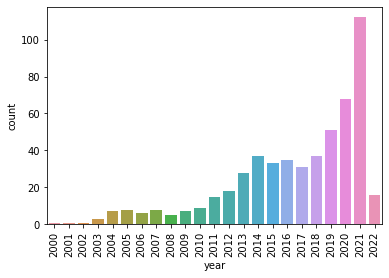

In [47]:
h=sns.countplot(dat_spec1_gasOnly.year)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '3.0'),
 Text(1, 0, '4.0'),
 Text(2, 0, '6.0'),
 Text(3, 0, '8.0'),
 Text(4, 0, '12.0')]

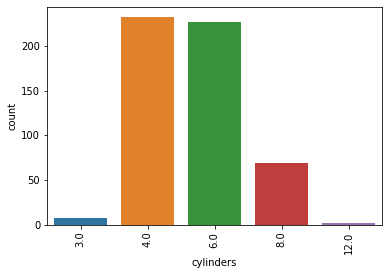

In [48]:
h=sns.countplot(dat_spec1_gasOnly.cylinders)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '1.0'),
 Text(1, 0, '1.3'),
 Text(2, 0, '1.4'),
 Text(3, 0, '1.5'),
 Text(4, 0, '1.6'),
 Text(5, 0, '2.0'),
 Text(6, 0, '2.4'),
 Text(7, 0, '2.5'),
 Text(8, 0, '2.9'),
 Text(9, 0, '3.0'),
 Text(10, 0, '3.3'),
 Text(11, 0, '3.5'),
 Text(12, 0, '3.6'),
 Text(13, 0, '4.0'),
 Text(14, 0, '4.4'),
 Text(15, 0, '5.0'),
 Text(16, 0, '5.3'),
 Text(17, 0, '5.7'),
 Text(18, 0, '6.3')]

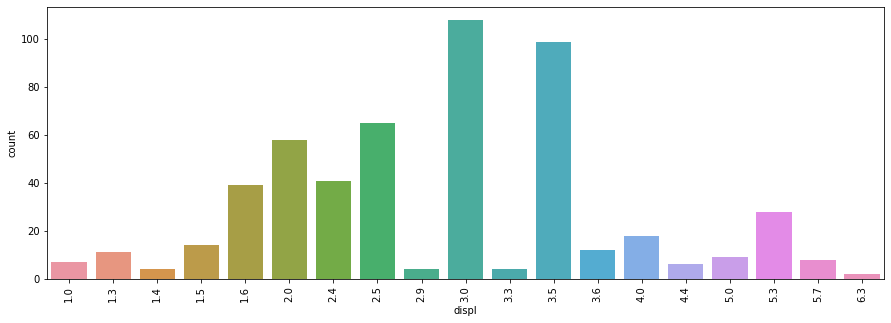

In [49]:
plt.figure(figsize=(15,5))
h=sns.countplot(dat_spec1_gasOnly.displ)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

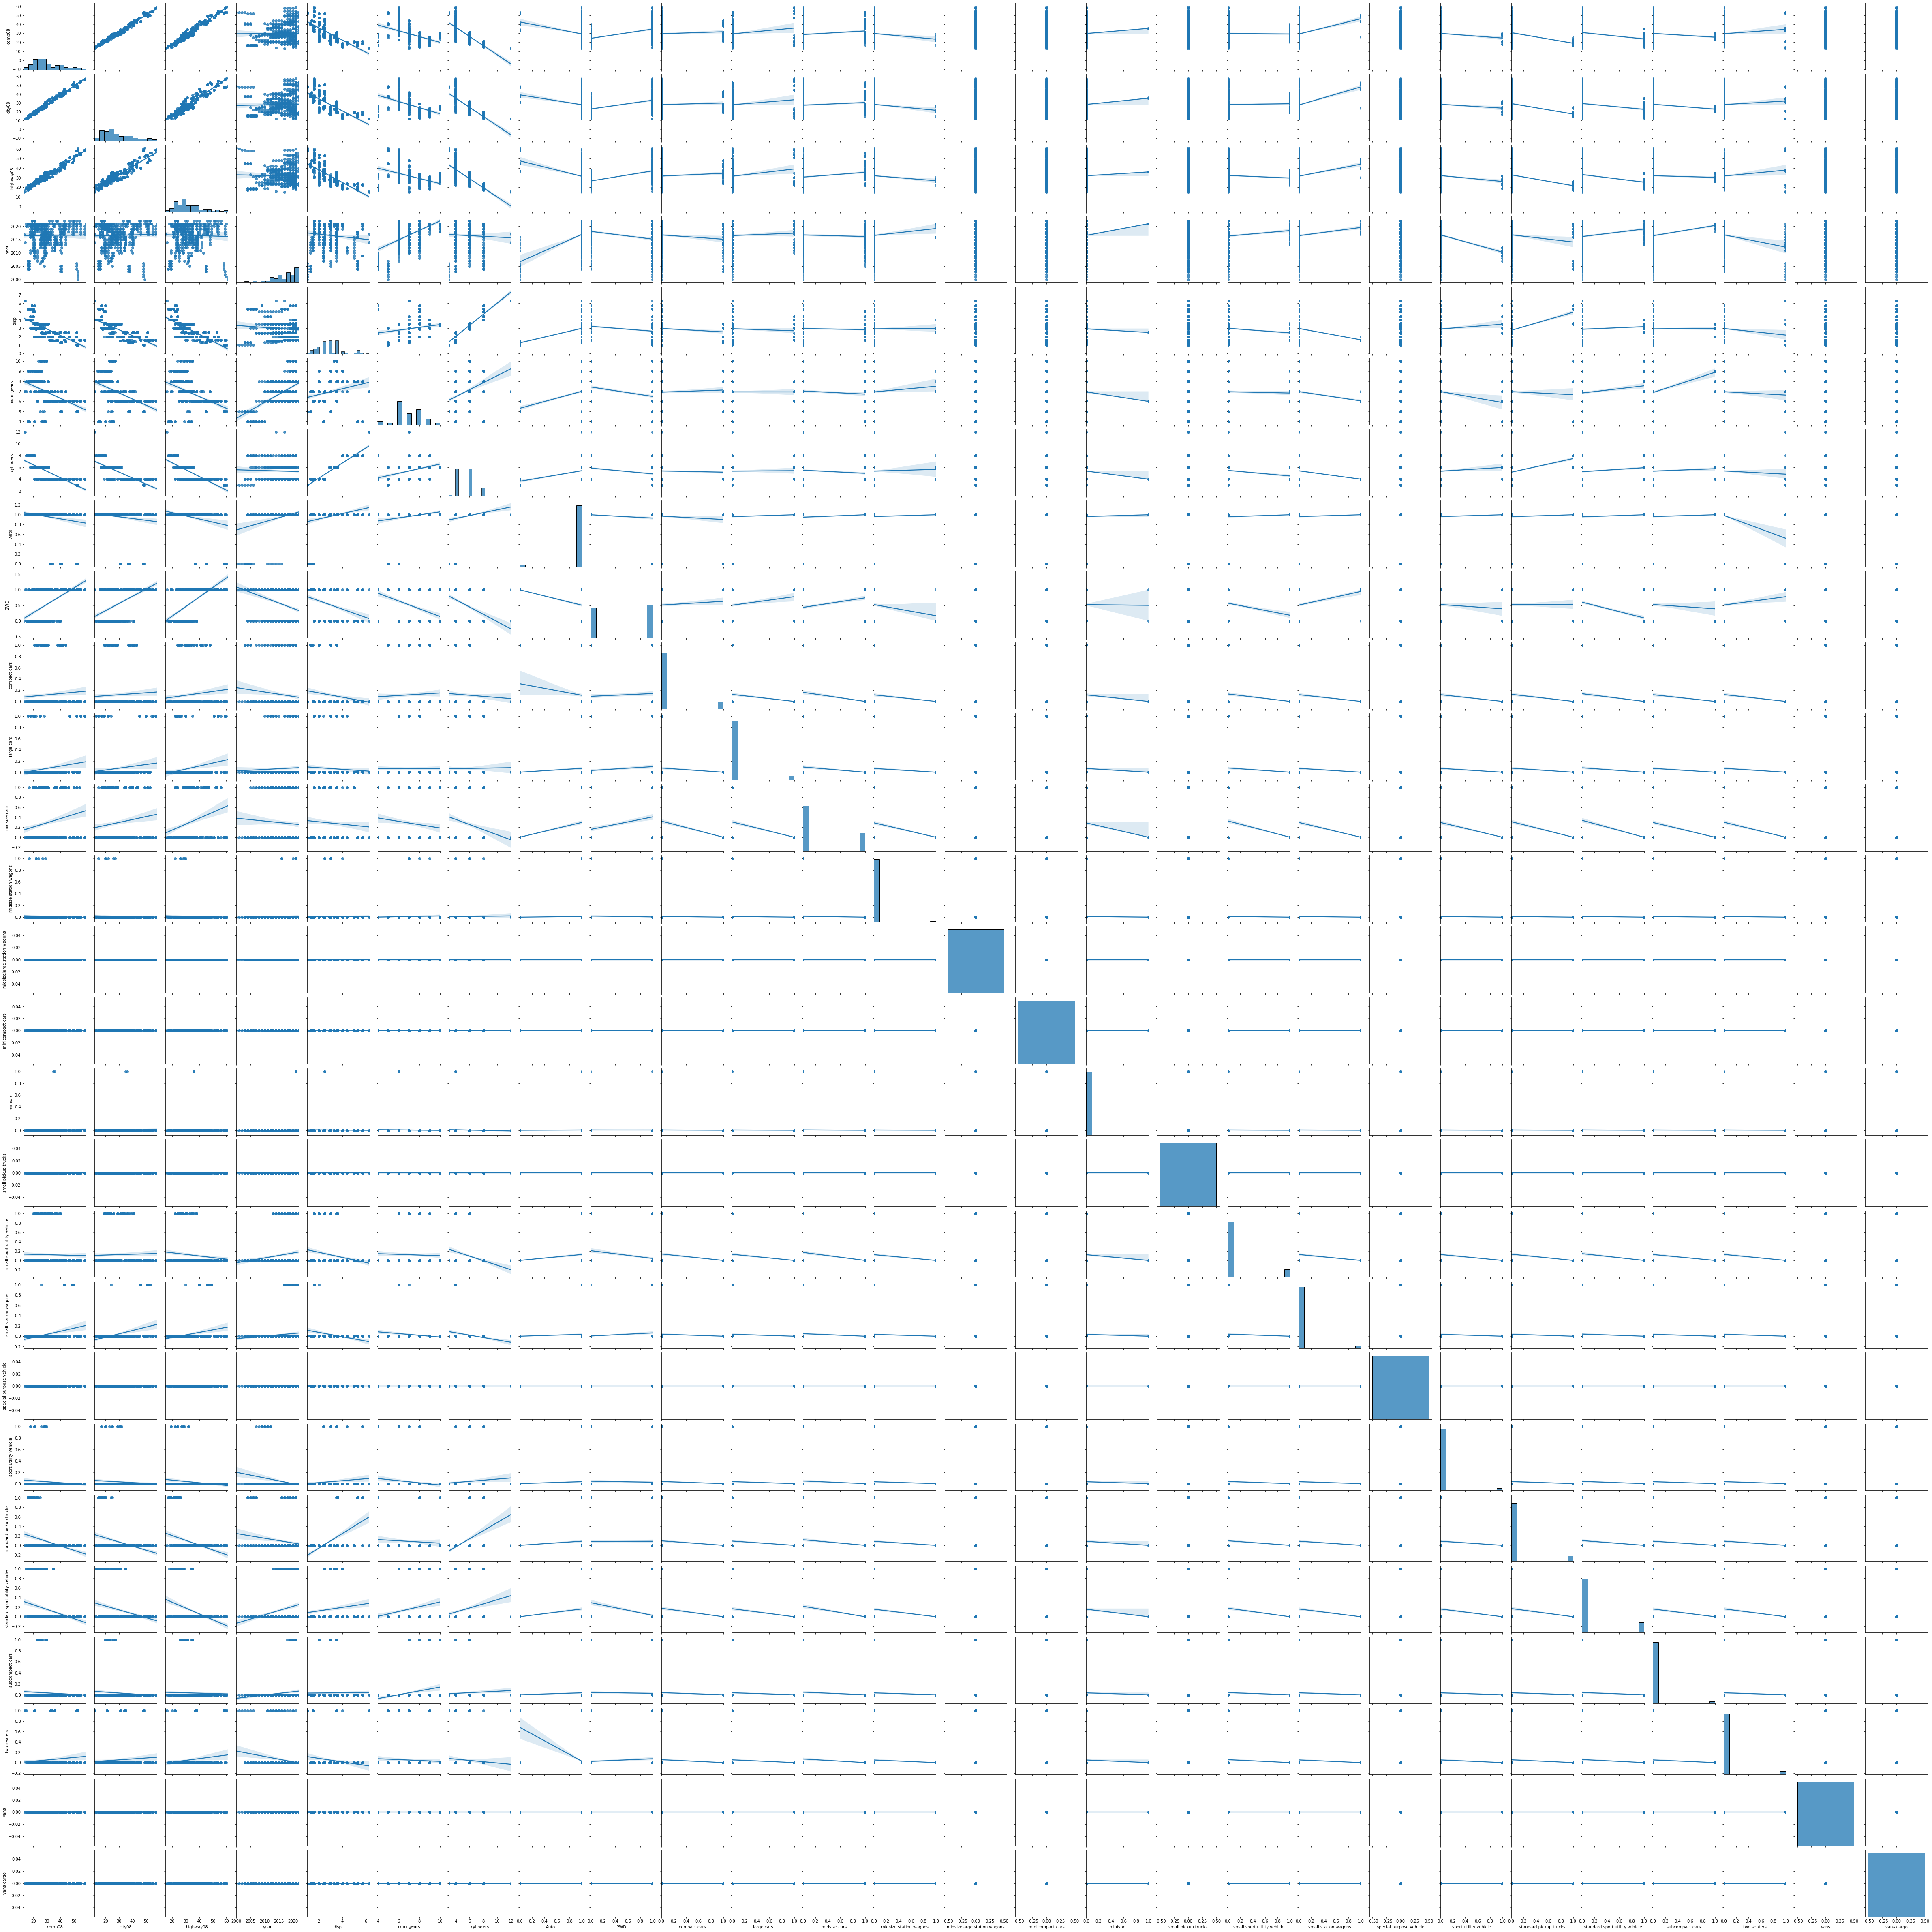

In [52]:
# check correlation across columns
sns.pairplot(dat_spec1_gasOnly, kind='reg')
plt.show()

#### comb08 is combined MPG based on city08 and highway08. That's why they are highly correlated. Just use comb08 for now.
#### in general, comb08 MPG decreases with bigger engines (displ), more # gears, more cylinders.

<AxesSubplot:>

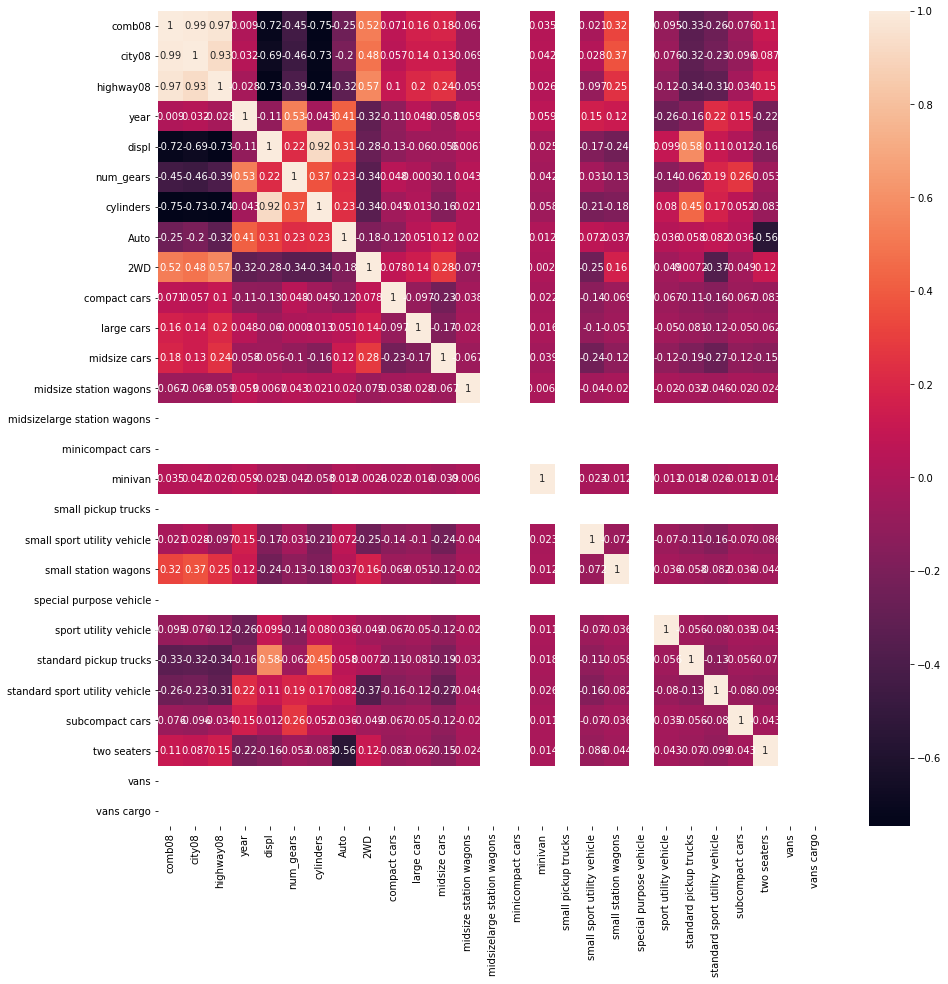

In [53]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dat_spec1_gasOnly.corr(),annot=True)

In [50]:
dat_spec1_gasOnly.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 6230 to 37438
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   comb08                          537 non-null    int64  
 1   city08                          537 non-null    int64  
 2   highway08                       537 non-null    int64  
 3   year                            537 non-null    int64  
 4   displ                           537 non-null    float64
 5   num_gears                       537 non-null    int64  
 6   cylinders                       537 non-null    float64
 7   Manual                          537 non-null    uint8  
 8   4WD                             537 non-null    uint8  
 9   large cars                      537 non-null    uint8  
 10  midsize cars                    537 non-null    uint8  
 11  midsize station wagons          537 non-null    uint8  
 12  midsizelarge station wagons    

In [ ]:
#dat_spec1_gasOnly['vans'].value_counts()

In [ ]:
#dat_spec1_gasOnly['minivan'].value_counts()

In [ ]:
# Some types of vehicles no longer have data. Drop corresponding dummies
#dat_spec1_gasOnly.drop(['vans cargo','vans','special purpose vehicle','small pickup trucks','minicompact cars','midsizelarge station wagons'],axis=1,inplace=True)

In [51]:
# Linear regression with no dummies first. Try first with no train/test splitting
m1 = LinearRegression()
X1 = dat_spec1_gasOnly[['displ','num_gears','cylinders','year']]
y1 = dat_spec1_gasOnly['comb08']
m1.fit(X1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print(m1.intercept_)

-520.3682976959221


In [53]:
m1.coef_

array([-3.83760643, -2.45946911, -1.64415446,  0.29124902])

In [82]:
import statsmodels.formula.api as sm

In [54]:
# Now splitting
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=0)

In [55]:
m1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='displ', ylabel='comb08'>

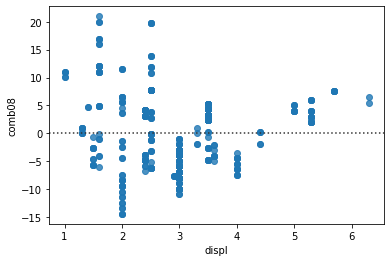

In [56]:
sns.residplot(X1_train.displ,y1_train)

<AxesSubplot:xlabel='num_gears', ylabel='comb08'>

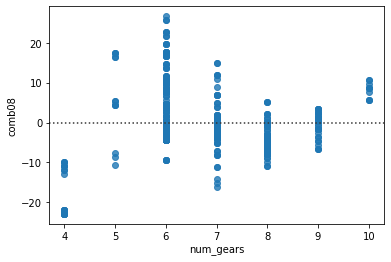

In [57]:
sns.residplot(X1_train.num_gears,y1_train)


<AxesSubplot:xlabel='cylinders', ylabel='comb08'>

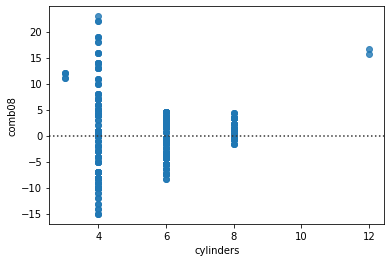

In [58]:
sns.residplot(X1_train.cylinders,y1_train)

<AxesSubplot:xlabel='year', ylabel='comb08'>

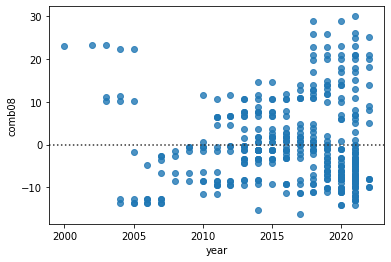

In [59]:
sns.residplot(X1_train.year,y1_train)

In [60]:
y1_predict=m1.predict(X1_test)

In [90]:
y1_predict

array([25.04531429, 36.11751188, 36.70748892, 38.58698759, 40.22938931,
       28.57982624, 38.58698759, 33.27182201, 19.56667365, 28.29157616,
       19.27842357, 34.63858521, 40.22938931, 24.30533907, 35.84273867,
       29.24429049, 26.77481478, 36.31779788, 19.6133433 , 27.42682591,
       23.06437466, 38.29873751, 35.79245085, 20.14317382, 23.64087482,
       22.32439945, 38.78813889, 28.66779032, 20.56535079, 38.81422734,
       37.14573718, 28.29157616, 37.43398726, 24.16708716, 20.76650209,
       35.50420077, 26.77481478, 34.87654747, 38.78813889, 29.73282657,
       35.50333546, 28.95604041, 38.78813889, 25.04531429, 28.57982624,
       26.77481478, 38.87523767, 24.18056404, 36.31779788, 35.50333546,
       17.43211768, 25.53385037, 20.56535079, 36.89429805, 24.01708899,
       24.46881412, 38.4245363 , 41.8620123 , 23.89231396, 38.29873751,
       39.94113922, 22.03614936, 27.71507599, 36.89429805, 35.79158554,
       15.95319101, 24.16708716, 26.39860062, 24.9573502 , 36.60

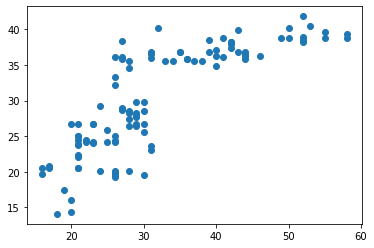

In [61]:
plt.scatter(x=y1_test,y=y1_predict)
plt.xlabel='test'
plt.ylabel='predicted'

/Users/dhuynh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comb08', ylabel='Density'>

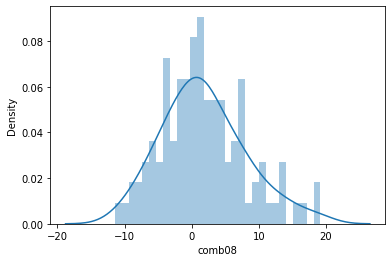

In [62]:
sns.distplot(y1_test-y1_predict,bins=30)

In [63]:
print('MSE of fitting: ',(1./len(y1_test))*(sum((y1_test-y1_predict)**2)))

MSE of fitting:  42.11123502727687


In [96]:
# Now to to include dummies
m2 = LinearRegression()
X2 = dat_spec1_gasOnly.drop(['comb08','city08','highway08'],axis=1)
y2 = dat_spec1_gasOnly['comb08']
m2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
m2.intercept_

-1131.2821279089205

In [100]:
m2.coef_

array([ 5.93143183e-01, -8.69421115e-01, -2.20071746e+00, -2.57081210e+00,
        6.52499636e+00, -4.35955923e+00,  3.09414967e+00, -6.89497576e-01,
       -5.55827042e+00, -1.77635684e-15, -3.55271368e-15, -4.11935957e+00,
       -4.44089210e-16, -4.29323912e+00,  4.83537712e+00,  0.00000000e+00,
       -2.29606795e+00, -4.10070094e+00, -3.86015750e+00, -1.65464171e+00,
       -9.56982972e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [101]:
# Now splitting
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=0)

In [102]:
m2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
y2_predict = m2.predict(X2_test)

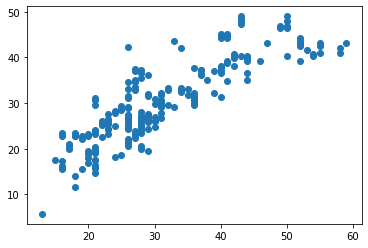

In [105]:
plt.scatter(x=y2_test, y=y2_predict)
plt.xlabel = 'test'
plt.ylabel = 'predict'

In [106]:
print('MSE of fitting: ',(1./len(y2_test))*(sum((y2_test-y2_predict)**2)))

MSE of fitting:  29.888293340513773


#### This model with dummies carrying info about transmission type, WD, vehicles type performs better tha the model without dummies!